# Comparing twiss parameters between topas and ParticlePhaseSpace

Topas has a twiss parameter particle generator; I want to check how well the particle generated by topas match the calculation ot the twiss parameters within ParticlePhaseSpace.

To do this, I am going to run the built in example file [Emittance_Twiss.txt](https://topas.readthedocs.io/en/latest/examples-docs/Basic/Emittance_Twiss.html). This file specifies the following twiss parameters:

```
u:So/Example/AlphaX      = 0.2
d:So/Example/BetaX       = 600.0 mm #
d:So/Example/EmittanceX  = 0.01 mm  #we don't multiply pi

u:So/Example/AlphaY      = 2.5
d:So/Example/BetaY       = 1400.0  mm
d:So/Example/EmittanceY  = 0.02 mm
```

By default, it will generate protons of energy 94 MeV (this is defined in the included [Emittance_Gaussian.txt](https://topas.readthedocs.io/en/latest/examples-docs/Basic/Emittance_Gaussian.html) file. Running [Emittance_Twiss.txt](https://topas.readthedocs.io/en/latest/examples-docs/Basic/Emittance_Twiss.html) will generate a phase space called `BeamTwiss.phsp`. We can read this into ParticlePhaseSpace as follows:

In [1]:
from pathlib import Path
import sys
sys.path.append('../')  # not necessary when the library is installed
from ParticlePhaseSpace import DataLoaders
from ParticlePhaseSpace import PhaseSpace

test_data_loc = Path(r'/home/brendan/Documents/temp/test_topas_emittance/BeamTwiss.phsp')
test_data = DataLoaders.Load_TopasData(test_data_loc)

PS = PhaseSpace(test_data)

Next, let's see what the twiss parameters look like:

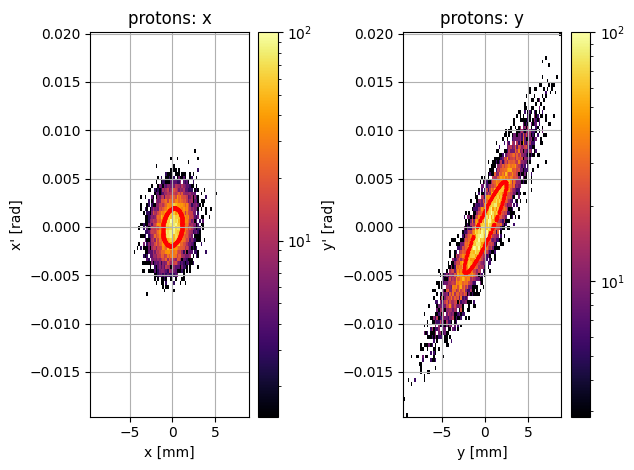

                 TWISS PARAMETERS                  

protons:
                  x            y
epsilon    0.002191     0.004328
alpha     -0.190474    -2.504369
beta     601.716454  1402.355201
gamma      0.001722     0.005185


In [2]:
PS.plot_transverse_trace_space_hist_2D()
PS.print_twiss_parameters()

Now, at first glance: the alpha and beta paraqmeters match quite well (although interestingly alpha has the opposite sign...) but the emittance seems a little off.
This is as expected however: when we calculate emittance with ParticlePhaseSpace, we calculate RMS emittance, which will encompass around 37% of the beam.
We can manually set the emmitance to the topas definition and recompare (the emittance controls the size of the ellipse, the other parameters controls orientation).

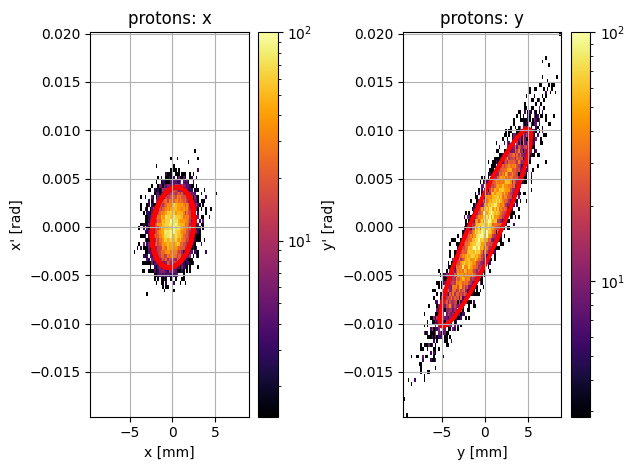

                 TWISS PARAMETERS                  

protons:
                  x            y
epsilon    0.010000     0.020000
alpha     -0.190474    -2.504369
beta     601.716454  1402.355201
gamma      0.001722     0.005185


In [4]:
PS.twiss_parameters['protons']['x']['epsilon'] = 0.01
PS.twiss_parameters['protons']['y']['epsilon'] = 0.02
PS.plot_transverse_trace_space_hist_2D()
PS.print_twiss_parameters()

bang on! (ok still not sure about why alpha has the opposite sign)

## Using the Generate_Twiss DataLoader

Although you can use topas's many functions to generate phase space data, it lacks visulisation tools - which means it can be quite difficult to visualise what your phase space actually looks like before you run your simulation.

For this purpose, you can use the Generate_Twiss DataLoader.